In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import zipfile
zip_file_path = '/content/drive/MyDrive/FYP/archive.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    print("ZIP context:")
    print(zip_ref.namelist())
    csv_file_name = 'Log_Problem.csv'
    with zip_ref.open(csv_file_name) as csv_file:
        log_problem_df = pd.read_csv(csv_file)
    csv_file_name = 'Info_Content.csv'
    with zip_ref.open(csv_file_name) as csv_file:
        info_content_df = pd.read_csv(csv_file)
    csv_file_name = 'Info_UserData.csv'
    with zip_ref.open(csv_file_name) as csv_file:
        info_user_df = pd.read_csv(csv_file)
top_150_uuids = log_problem_df['uuid'].value_counts().head(50)
print(top_100_uuids)

ZIP 文件中的內容:
['Info_Content.csv', 'Info_UserData.csv', 'Log_Problem.csv']
出現次數最多的100位 uuid：
uuid
RDG5hfSbUMf2mV22bLi+o/W8aC1nXnuOrJpavtnD6D4=    11813
AOiWUboG4F8jUMXURPo8smWcxYz8oyyH/4PZQZ/rdkE=    11122
A69+dvJ/34hPvtsTyym4FmetQq4bd+I6GoarDVB2amY=    10949
+BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=     8926
XAiBVyGkfP4pnl9CC7vHVV6lJ1bv12TGivS/IMVuRY8=     8772
                                                ...  
aq7pVQJMk514YRibcCYVx5/+ThMDoHa2Ge+tiBx6iYk=     4825
Zas0Kqo+5nnMWSAcApvg58kR2JKjUwDb82Y/T4edvfE=     4822
pz0H5sZViFCoXobpmlbPuAt2BzH5f+SNixGU8jGqkHg=     4812
DChPHPx+FROMq6gpTagI5pprks7gVOEkXKmE+jOcgRk=     4811
C5SBQ2TAkVWuhtD1XeyenOaQfniYDGl/939YQDrDNSo=     4795
Name: count, Length: 80, dtype: int64


In [ ]:
top_100_uuids = log_problem_df['uuid'].value_counts().head(75)
print(top_100_uuids)

uuid
RDG5hfSbUMf2mV22bLi+o/W8aC1nXnuOrJpavtnD6D4=    11813
AOiWUboG4F8jUMXURPo8smWcxYz8oyyH/4PZQZ/rdkE=    11122
A69+dvJ/34hPvtsTyym4FmetQq4bd+I6GoarDVB2amY=    10949
+BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=     8926
XAiBVyGkfP4pnl9CC7vHVV6lJ1bv12TGivS/IMVuRY8=     8772
                                                ...  
pFxWK1U/srWofM2u+3cgMZ43dM7EMU4cgHyaJdb7jAU=     5020
cxJJvM9se94ZoQPbSGBNWTLYfubRW1CrnPhZUHTEEpA=     5001
8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=     4999
tb+KIMk0+2j+WSzS9ZJOWmYDsJ6KhIIdzfb1yeWce2Q=     4994
p0AIMKKPHKUo744QTi+1tQcd00Pfc+lFUEpM8KWHdMw=     4937
Name: count, Length: 75, dtype: int64


In [ ]:
log_problem_df = log_problem_df.drop(columns=['content_pretty_name','problem_number',
                  'exercise_problem_repeat_session'], errors='ignore')
info_content_df = info_content_df.drop(columns=['content_pretty_name','level1_id', 'level2_id',
                          'level3_id', 'level4_id'], errors='ignore')
info_user_df = info_user_df.drop(columns=['content_pretty_name','has_teacher_cnt', 'is_self_coach',
            'has_student_cnt', 'has_class_cnt', 'belongs_to_class_cnt'], errors='ignore')
print("df_problem content:")
print(log_problem_df.head())
print("df_Info content:")
print(info_content_df.head())
print("df_user content:")
print(info_user_df.head())
merged_df = pd.merge(log_problem_df, info_content_df, on='ucid', how='left')
final_merged_df = pd.merge(merged_df, info_user_df, on='uuid', how='left')
print("merged dataset ::")
print(final_merged_df.head())
final_merged_df.to_csv('final_merged_dataset.csv', index=False)
print("Saved at 'final_merged_dataset.csv'")

df_problem中的內容:
              timestamp_TW                                          uuid  \
0  2019-05-26 21:00:00 UTC  FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=   
1  2019-05-17 16:30:00 UTC  +Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=   
2  2019-05-15 19:15:00 UTC  6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=   
3  2019-05-05 14:45:00 UTC  GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=   
4  2019-05-14 16:45:00 UTC  JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=   

                                           ucid  \
0  KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=   
1  COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=   
2  TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=   
3  tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=   
4  vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=   

                                           upid  is_correct  total_sec_taken  \
0  Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=        True               33   
1  Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=        True 

from input 3 big file and merged them together:

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import zipfile
data = pd.read_csv('modified_dataset.csv')
data



,timestamp_TW,uuid,ucid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,...,content_kind,difficulty,subject,learning_stage,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city
0,2019-06-12 20:00:00 UTC,1Mu4HQwpCFX0olLoJrHWE+XWq6XIaJ13Y14QePDB6fQ=,algebra_polynomial_roots,+SCdwxKIyvmq271mlV2oCxG/gCRMp9/QKdXDZQq86Yg=,True,9,1,0,False,False,...,Exercise,normal,math,elementary,female,1984137,216,2019-03-22,5,tc
1,2019-06-20 21:45:00 UTC,+jEVzAMdwxfbrYXsSHh8V54mVaIVTL3Wqns20Z67u78=,arithmetic_mul_div_multiple,2w6iJBvtBQ/grXVAFiqGXusL2gUwe+bwpPmq42Y42OE=,True,79,1,0,False,NaN,...,Exercise,easy,math,junior,male,1589782,760,2018-08-09,11,kh
2,2019-06-04 21:45:00 UTC,mzIuPqJIQy94DmoZ9PzjcycXFKCvhSwjUQ4AEKnrRII=,numbers_is_factor,0OxXhE288MiSBkrzURhn4n2f+ML3jXYw2m7Kl2wrr1U=,True,13,1,0,False,NaN,...,Exercise,easy,math,elementary,NaN,1979716,101,2018-11-26,7,cy
3,2019-06-13 18:45:00 UTC,noaQE5C23TSo0jw5tMBHn6OVcEq3WD/F8TWBoB2leM0=,arithmetic_mixed,U4EWwpr2syN7xHqkECV617nJdtMjrvCZUkkG5nMXUq0=,False,8,6,1,True,NaN,...,Exercise,hard,math,elementary,female,1501572,129,2018-09-17,4,ty
4,2019-06-21 14:45:00 UTC,+jEVzAMdwxfbrYXsSHh8V54mVaIVTL3Wqns20Z67u78=,measurement_conversion,wmIdIOsg3WWMrI4CNUdLyyLPx/6XW3lX6VBMqXKOKqI=,False,10,6,2,True,NaN,...,Exercise,easy,math,junior,male,1589782,760,2018-08-09,11,kh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118543,2019-04-30 12:45:00 UTC,UlTWq+fPusJ++4TVY1NdC5uDcEwQ3yoLylECJWMjuvs=,measurement_time,dWeJM21pnuZVinox++Zo0fhgEws8rcyERU45JCID8/A=,True,68,1,0,False,NaN,...,Exercise,normal,math,elementary,male,1830285,234,2019-01-10,4,ty
118544,2019-04-04 21:45:00 UTC,NDzPBdfvTs5EV5vIaLD46rSg2y+SN1VsU0QBymgOJMQ=,arithmetic_add_or_sub_in_base,ijNE2+C4MOUrGcxZ6fHBfZKiVVsaTFlpHSH8ta24RaY=,True,33,1,0,False,NaN,...,Exercise,easy,math,elementary,male,1181691,238,2019-03-12,3,ty
118545,2019-04-15 16:15:00 UTC,noaQE5C23TSo0jw5tMBHn6OVcEq3WD/F8TWBoB2leM0=,numbers__round_number_composed,/gkkIsFjBKflNpjkL8pVqSUmR9R3YYHAZl2WY4zqtuk=,True,15,1,0,False,NaN,...,Exercise,easy,math,elementary,female,1501572,129,2018-09-17,4,ty
118546,2019-04-10 09:45:00 UTC,+dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=,numbers__is_prime_composed,u7rWNEF3WnGv/I1e92mnE6w9MVNPLr9kXTFK5otTW2g=,True,27,1,0,False,NaN,...,Exercise,easy,math,elementary,female,976429,269,2018-09-13,6,hlc


<ipython-input-26-ce8dbcb214bb>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return grouped.apply(process_group).reset_index(drop=True)


已保存最終等級數據集到 'student_final_levels.csv'
                                            uuid  \
0   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
1   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
2   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
3   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
4   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
5   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
6   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
7   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
8   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
9   +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
10  +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
11  +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
12  +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
13  +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
14  +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
15  +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
16  +BeTBLBOIRg/wE3KNY9+i2oHUnpDKR08r/K2EXM2zA8=   
17  +BeTBLBOIRg/wE3KNY9+i

In [ ]:
import numpy as np
data['level'] = 0
data['is_upgrade'] = None
data['is_downgrade'] = None

def apply_leveling_rule(df):
    grouped = df.groupby(['uuid', 'ucid'])
    for (user, content), group in grouped:
        level = 0
        correct_streak = 0
        wrong_streak = 0

        for idx, row in group.iterrows():
            if row['is_correct'] == True:
                correct_streak += 1
                wrong_streak = 0
            else:
                correct_streak = 0
                wrong_streak += 1
            if level == 0 and correct_streak >= 5:
                level = 1
                df.at[idx, 'is_upgrade'] = True
                df.at[idx, 'is_downgrade'] = False
                correct_streak = 0

            elif level >= 1 and level < 4:
                if correct_streak == 2:
                    level += 1
                    df.at[idx, 'is_upgrade'] = True
                    df.at[idx, 'is_downgrade'] = False
                    correct_streak = 0
                elif wrong_streak == 2:
                    level -= 1
                    df.at[idx, 'is_upgrade'] = False
                    df.at[idx, 'is_downgrade'] = True
                    wrong_streak = 0
                else:
                    df.at[idx, 'is_upgrade'] = None
                    df.at[idx, 'is_downgrade'] = None
            df.at[idx, 'level'] = level

    return df
data =  apply_leveling_rule(data)
final_levels_df = data.groupby(['uuid', 'ucid']).last().reset_index()
final_levels_df = final_levels_df[['uuid', 'ucid', 'level']]
final_levels_df.to_csv('student_final_levels.csv', index=False)
print("Saved at 'student_final_levels.csv'")
print(final_levels_df.head(50))

已保存最終等級數據集到 'student_final_levels.csv'
                                            uuid  \
0   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
1   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
2   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
3   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
4   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
5   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
6   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
7   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
8   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
9   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
10  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
11  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
12  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
13  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
14  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
15  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
16  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
17  +dIi8S6R6ah/U5r7oPi05

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb
from joblib import dump
data = pd.read_csv("student_final_levels.csv")
X = data.drop(['level'], axis=1)
y = data['level']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100, 150],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    lgb_model, param_distributions=param_dist, n_iter=20, scoring='f1_weighted', cv=5,
    n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("classification_report：")
print(classification_report(y_test, y_pred))
print("accuracy：", accuracy_score(y_test, y_pred))
dump(best_model, "optimized_model_full_data.pkl")
print("model saved 'optimized_model_full_data.pkl'")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 5239, number of used features: 199
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
!pip uninstall mathematics_dataset
!pip install mathematics_dataset
! pip install --upgrade mathematics_dataset

Found existing installation: mathematics-dataset 1.0.1
Uninstalling mathematics-dataset-1.0.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/mathematics_dataset-1.0.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/mathematics_dataset/*
Proceed (Y/n)? Y
  Successfully uninstalled mathematics-dataset-1.0.1
  Using cached mathematics_dataset-1.0.1-py3-none-any.whl.metadata (1.5 kB)
Using cached mathematics_dataset-1.0.1-py3-none-any.whl (93 kB)


In [ ]:

!pip install --upgrade sympy
!pip install --upgrade mathematics_dataset
!pip install six
!pip install absl-py
!pip install numpy
!pip install sympy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [ ]:
from mathematics_dataset.util import composition

# Create a context (this is just a placeholder; you'll need to implement it correctly)
context = composition.Context()  # Adjust as necessary for your implementation

# Define a template for the question
template = 'What is {} plus {p} over {q}?'

# Generate the question
q = question(context, template, 2, p=3, q=4)

# Define the answer (this should be calculated based on your logic)
answer = 2 + 3 / 4  # Example calculation

# Create a Problem instance
problem = Problem(question=q, answer=answer)

# Print the question and answer
print("问题:", problem.question)
print("答案:", problem.answer)

NameError: name 'question' is not defined

In [ ]:
import pandas as pd
import random

#df = pd.read_csv('/content/drive/MyDrive/FYP/final_merged_dataset.csv')
df = pd.read_csv('final_merged_dataset.csv')
new_ucids = [
    "algebra_linear_1d","algebra__linear_1d_composed", "algebra_linear_2d","algebra__linear_2d_composed", "algebra_polynomial_roots","algebra__polynomial_roots_composed","calculus__differentiate_composed,"
    "algebra_sequence_next_term", "algebra_sequence_nth_term","comparison__closest_composed","comparison__kth_biggest_composed","comparison__pair_composed","comparison__sort_composed","numbers__div_remainder_composed",
    "arithmetic_add_or_sub", "arithmetic_add_or_sub_in_base","numbers__gcd_composed","numbers__is_factor_composed","numbers__is_prime_composed","numbers__lcm_composed","numbers__list_prime_factors_composed",
    "arithmetic_add_sub_multiple", "arithmetic_div", "arithmetic_mixed","numbers__place_value_composed","numbers__round_number_composed","polynomials__evaluate_composed",
    "arithmetic_mul", "arithmetic_mul_div_multiple",
    "arithmetic_nearest_integer_root", "arithmetic_simplify_surd",
    "calculus_differentiate", "comparison_closest", "comparison_kth_biggest",
    "comparison_pair", "comparison_sort", "measurement_conversion",
    "measurement_time", "numbers_base_conversion", "numbers_div_remainder",
    "numbers_gcd", "numbers_is_factor", "numbers_is_prime", "numbers_lcm",
    "numbers_list_prime_factors", "numbers_place_value", "numbers_round_number",
    "polynomials_add", "polynomials_coefficient_named", "polynomials_collect",
    "polynomials_compose", "polynomials_evaluate", "polynomials_expand",
    "polynomials_simplify_power", "probability_swr_p_level_set",
    "probability_swr_p_sequence"
]


all_ucids = df['ucid'].tolist()

replace_count = len(all_ucids)

ucid_mapping = {}
for i in range(min(len(new_ucids), replace_count)):
    ucid_mapping[all_ucids[i]] = new_ucids[i]

remaining_ucids = all_ucids[len(new_ucids):]
for ucid in remaining_ucids:
    ucid_mapping[ucid] = random.choice(new_ucids)

df['ucid'] = df['ucid'].replace(ucid_mapping)
df.to_csv('demo_dataset.csv', index=False)

print('done。')

In [ ]:

with open('/content/drive/MyDrive/FYP/train-easy/algebra__linear_1d.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
if len(lines) >= 2:
    for i in range (10):
      line1 = lines[i].strip()
      line2 = lines[i+1].strip()
      print("問題:", line1)
      print("答案:", line2)
      print("")
      i=i+2
else:
    print("文件中沒有足夠的行數。")


問題: Solve 0 = 4*b + b + 15 for b.
答案: -3

問題: -3
答案: Solve -3*d = -0*d + 3 for d.

問題: Solve -3*d = -0*d + 3 for d.
答案: -1

問題: -1
答案: Solve -4*h + 9 = 41 for h.

問題: Solve -4*h + 9 = 41 for h.
答案: -8

問題: -8
答案: Solve 2514*m = 2508*m - 24 for m.

問題: Solve 2514*m = 2508*m - 24 for m.
答案: -4

問題: -4
答案: Solve -7*a + 6*a = 4 for a.

問題: Solve -7*a + 6*a = 4 for a.
答案: -4

問題: -4
答案: Solve 288*w - 298*w = -70 for w.



In [ ]:
import random
a='algebra__linear_1d.txt'
b='train-easy'
with open('/content/drive/MyDrive/FYP/'+b+'/'+a, 'r', encoding='utf-8') as file:
    lines = file.readlines()
if len(lines) % 2 != 0:
    print("ERROR! 文件行數不正確")
else:
    qa_pairs = [(lines[i].strip(), lines[i + 1].strip()) for i in range(0, len(lines), 2)]

    selected_indices = random.sample(range(len(qa_pairs)), 2)
    selected_pairs = [qa_pairs[i] for i in selected_indices]

    for i, (question, answer) in enumerate(selected_pairs, start=1):
        print(f"問題:", question)
        print(f"答案:", answer)

問題: Solve -t - 5 = -0*t for t.
答案: -5
問題: Solve -8 = 8*s - 6*s for s.
答案: -4


In [ ]:
import pandas as pd
import random
import os

df = pd.read_csv('student_final_levels.csv')
df_sample = df.sample(frac=0.1, random_state=1)

difficulty_map = {
    0: 'easy',
    1: 'easy',
    2: 'medium',
    3: 'medium',
    4: 'hard'
}

df_sample['difficulty'] = df_sample['level'].map(difficulty_map)

def get_random_qa_pairs(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    if len(lines) % 2 != 0:
        print(f"文件 {file_path} 行數不正確 ")
        return None

    qa_pairs = [(lines[i].strip(), lines[i + 1].strip()) for i in range(0, len(lines), 2)]

    if len(qa_pairs) == 0:
        return None

    selected_pair = random.choice(qa_pairs)
    return selected_pair

qa_results = []
base_path = '/content/drive/MyDrive/FYP/'

for index, row in df_sample.iterrows():
    difficulty = row['difficulty']
    ucid = row['ucid']

    file_name = f"{ucid}.txt"
    file_path = os.path.join(base_path, f"train-{difficulty}", file_name)

    if os.path.exists(file_path):
        qa_pair = get_random_qa_pairs(file_path)
        if qa_pair:
            question, answer = qa_pair
            qa_results.append((row['uuid'], ucid, row['level'], difficulty, question, answer))

qa_result_df = pd.DataFrame(qa_results, columns=['uuid', 'ucid', 'level', 'difficulty', 'question', 'answer'])
qa_result_df.to_csv('extracted_questions_with_answers.csv', index=False)

加入deep learning version

In [ ]:
# 導入必要的庫
import pandas as pd
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 資料載入與預處理
# 假設資料集為 'student_data.csv'，包含 'uuid', 'ucid', 'timestamp_TW', 'is_correct' 等欄位
# 你需要在 Colab 上傳這個檔案到 /content 目錄
data = pd.read_csv('/content/drive/MyDrive/FYP/modified_dataset.csv')
#data = pd.read_csv('/content/modified_dataset.csv')
data['timestamp_TW'] = pd.to_datetime(data['timestamp_TW'])
data.sort_values(by=['uuid', 'ucid', 'timestamp_TW'], inplace=True)

# 2. 等級系統實現
data['level'] = 0
data['correct_streak'] = 0
data['wrong_streak'] = 0

def apply_leveling_rules(data):
    grouped = data.groupby(['uuid', 'ucid'])

    def process_group(group):
        is_correct = group['is_correct'].values
        level = np.zeros(len(is_correct), dtype=int)
        correct_streak = np.zeros(len(is_correct), dtype=int)
        wrong_streak = np.zeros(len(is_correct), dtype=int)
        current_level = 0

        for i in range(len(is_correct)):
            if is_correct[i]:
                correct_streak[i] = correct_streak[i - 1] + 1 if i > 0 else 1
                wrong_streak[i] = 0
            else:
                correct_streak[i] = 0
                wrong_streak[i] = wrong_streak[i - 1] + 1 if i > 0 else 1

            if current_level == 0 and correct_streak[i] >= 5:
                current_level = 1
                correct_streak[i] = 0
            elif current_level >= 1 and current_level < 4:
                if correct_streak[i] >= 2:
                    current_level += 1
                    correct_streak[i] = 0
                elif wrong_streak[i] >= 2:
                    current_level -= 1
                    wrong_streak[i] = 0

            level[i] = current_level

        group['level'] = level
        return group

    return grouped.apply(process_group).reset_index(drop=True)

data = apply_leveling_rules(data)

# 3. 特徵工程
# 提取每個 uuid 和 ucid 的最終等級
final_levels_df = data.groupby(['uuid', 'ucid']).last().reset_index()
final_levels_df = final_levels_df[['uuid', 'ucid', 'level']]

features_df = data.groupby(['uuid', 'ucid']).agg({
    'is_correct': ['sum', 'count'],
    'timestamp_TW': ['min', 'max']
}).reset_index()
features_df.columns = ['uuid', 'ucid', 'correct_sum', 'total_questions', 'first_attempt', 'last_attempt']
features_df['correct_rate'] = features_df['correct_sum'] / features_df['total_questions']

final_data = pd.merge(features_df, final_levels_df, on=['uuid', 'ucid'])

X = final_data.drop(['level', 'uuid', 'ucid', 'first_attempt', 'last_attempt'], axis=1)
y = final_data['level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32,
                    callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"測試集準確率: {test_accuracy}")
model.save('/content/student_level_model.h5')


def get_random_qa_pairs(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    if len(lines) % 2 != 0:
        print(f"文件 {file_path} 行數不正確")
        return None
    qa_pairs = [(lines[i].strip(), lines[i + 1].strip()) for i in range(0, len(lines), 2)]
    if len(qa_pairs) == 0:
        return None
    selected_pair = random.choice(qa_pairs)
    return selected_pair

# 定義難度映射
difficulty_map = {0: 'easy', 1: 'easy', 2: 'medium', 3: 'medium', 4: 'hard'}
base_path = '/content/drive/MyDrive/FYP/'  # 請替換為你的 Google Drive 路徑

# 使用測試集前 10 筆資料進行預測和問題抽取
new_data = X_test
predictions = model.predict(new_data)
predicted_levels = np.argmax(predictions, axis=1)
qa_results = []

for i, level in enumerate(predicted_levels):
    difficulty = difficulty_map[level]
    ucid = final_data.iloc[i]['ucid']  # 從 final_data 獲取 ucid
    file_path = os.path.join(base_path, f"train-{difficulty}", f"{ucid}.txt")
    if os.path.exists(file_path):
        qa_pair = get_random_qa_pairs(file_path)
        if qa_pair:
            question, answer = qa_pair
            qa_results.append((final_data.iloc[i]['uuid'], ucid, level, difficulty, question, answer))

# 將結果保存為 CSV
qa_result_df = pd.DataFrame(qa_results, columns=['uuid', 'ucid', 'level', 'difficulty', 'question', 'answer'])
qa_result_df.to_csv('/content/extracted_questions_with_answers.csv', index=False)
print("已保存抽取的問題和答案到 '/content/extracted_questions_with_answers.csv'")
level_predict_df = qa_result_df[['uuid', 'ucid', 'level']]
level_predict_df.to_csv('/content/level_predict.csv', index=False)

<ipython-input-1-a4bc75191bd1>:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return grouped.apply(process_group).reset_index(drop=True)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4603 - loss: 1.5149 - val_accuracy: 0.8106 - val_loss: 1.2266
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8953 - loss: 1.1306 - val_accuracy: 0.8106 - val_loss: 0.8908
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8855 - loss: 0.8047 - val_accuracy: 0.8106 - val_loss: 0.6319
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9036 - loss: 0.5702 - val_accuracy: 0.8636 - val_loss: 0.4668
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9022 - loss: 0.4572 - val_accuracy: 0.8864 - val_loss: 0.3760
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9152 - loss: 0.3905 - val_accuracy: 0.8939 - val_loss: 0.3281
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9077 - loss: 0.3490 - val_accuracy: 0.9015 - val_loss: 0.3007
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9252 - loss: 0.3138 - val_accuracy: 0.8939 - val_loss: 0.2815
Ep

測試集準確率: 0.9329268336296082
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
已保存抽取的問題和答案到 '/content/extracted_questions_with_answers.csv'


# 新增區段

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32,
                    callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"測試集準確率: {test_accuracy}")
model.save('student_level_model.h5')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.2838 - loss: 20.6480 - val_accuracy: 0.8106 - val_loss: 4.8572
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8363 - loss: 4.7831 - val_accuracy: 0.8106 - val_loss: 3.4819
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8456 - loss: 2.5621 - val_accuracy: 0.8182 - val_loss: 1.9203
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8196 - loss: 2.0488 - val_accuracy: 0.8182 - val_loss: 1.1689
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8163 - loss: 1.9236 - val_accuracy: 0.8636 - val_loss: 0.7879
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8377 - loss: 1.7974 - val_accuracy: 0.9015 - val_loss: 0.7172
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8218 - loss: 1.6456 - val_accuracy: 0.8864 - val_loss: 0.7230
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8711 - loss: 0.7972 - val_accuracy: 0.8864 - val_loss: 0.699

測試集準確率: 0.9329268336296082


For the assment 2009 to 2010 dataset

In [ ]:

skill_attempts = data.groupby(['user_id', 'list_skills']).size().reset_index(name='total_attempts')
skill_errors = data.groupby(['user_id', 'list_skills'])['correct'].apply(lambda x: (x == 0).sum()).reset_index(name='errors'
skill_error_rate = pd.merge(skill_attempts, skill_errors, on=['user_id', 'list_skills'])
skill_error_rate['error_rate'] = skill_error_rate['errors'] / skill_error_rate['total_attempts']
user_skills = skill_error_rate.pivot(index='user_id', columns='list_skills', values='error_rate').fillna(0).reset_index()
skill_columns = [col for col in user_skills.columns if col != 'user_id']
user_skills['target_skill'] = user_skills[skill_columns].idxmax(axis=1)



In [ ]:
X = user_skills[skill_columns]
y = user_skills['target_skill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

混淆矩陣:
[[315   0   0   0   1   0   1]
 [  0  28   2   0   0   0   2]
 [  0   1  12   3   0   1   0]
 [  1   1   0  72   2   1   2]
 [  4   0   0   0 122   0   3]
 [  2   2   0   0   3  52   0]
 [  1   0   0   0   2   0 115]]

分類報告:
                                              precision    recall  f1-score   support

                              Absolute_Value       0.98      0.99      0.98       317
                    Algebraic_Simplification       0.88      0.88      0.88        32
                           Algebraic_Solving       0.86      0.71      0.77        17
Picking_Equation_and_Expression_From_Choices       0.96      0.91      0.94        79
                        Probability_Compound       0.94      0.95      0.94       129
     Properties_and_Classification_Triangles       0.96      0.88      0.92        59
                         Pythagorean_Theorem       0.93      0.97      0.95       118

                                    accuracy                           0.95    

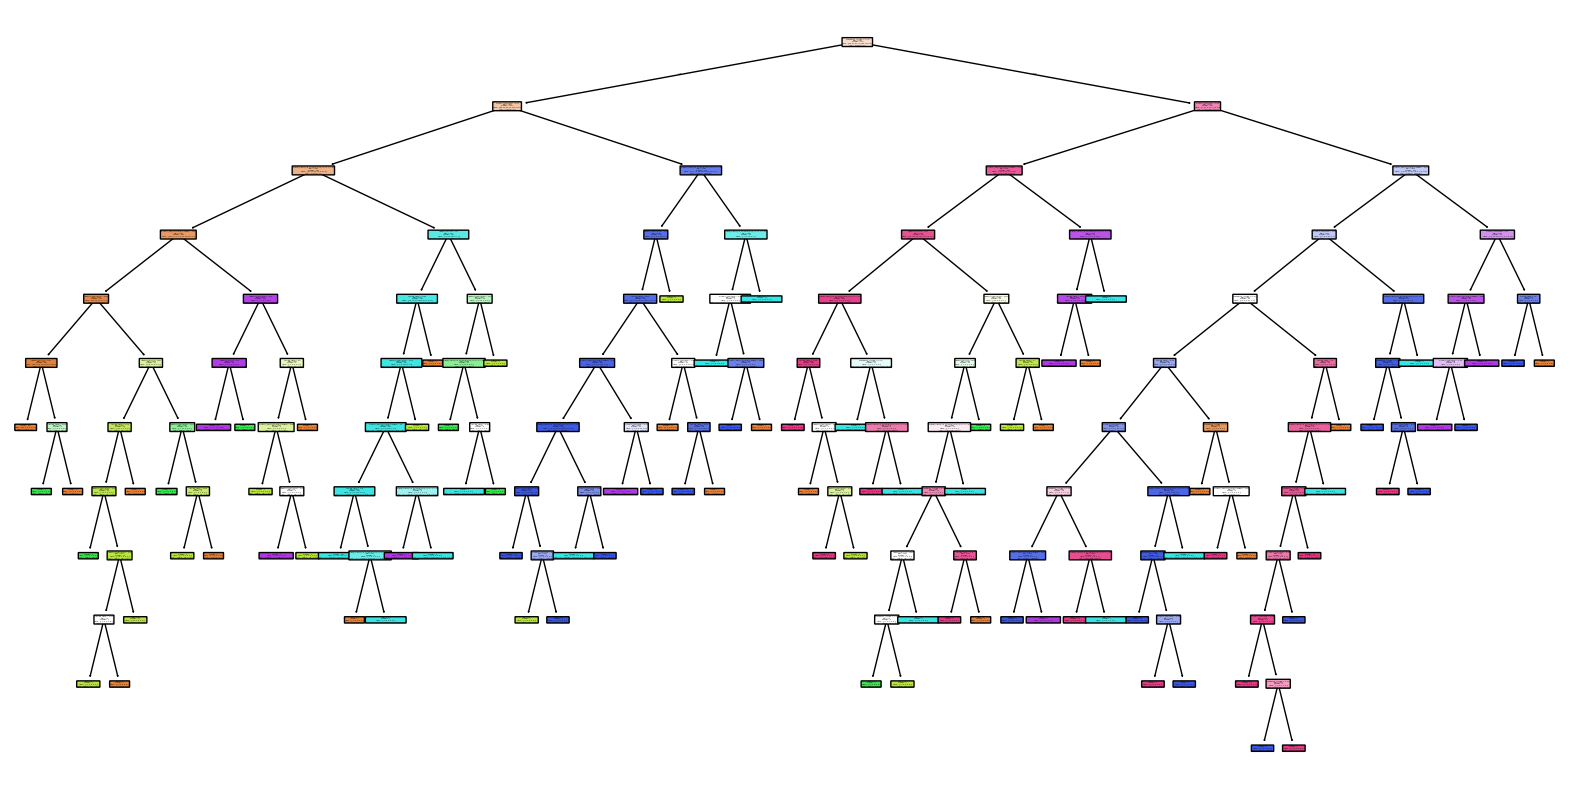


用戶需要加強的技能及教學資源：
list_skills  user_id                    predicted_skill_to_improve  \
1105         79896.0                           Pythagorean_Theorem   
2055         87763.0                                Absolute_Value   
1386         81470.0                          Probability_Compound   
1036         79650.0                          Probability_Compound   
321          78101.0                                Absolute_Value   
...              ...                                           ...   
427          78240.0                      Algebraic_Simplification   
105          71135.0                           Pythagorean_Theorem   
2432         96226.0                          Probability_Compound   
121          71155.0  Picking_Equation_and_Expression_From_Choices   
2028         87065.0                                Absolute_Value   

list_skills                                  teaching_resource  \
1105                https://www.mathsisfun.com/pythagoras.html   
2055      

In [ ]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("混淆矩陣:")
print(confusion_matrix(y_test, y_pred))
print("\n分類報告:")
print(classification_report(y_test, y_pred))
print("\n模型準確度:")
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=skill_columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

teaching_resources = {
    'Probability_Compound': 'https://www.khanacademy.org/math/statistics-probability/probability',
    'Properties_and_Classification_Triangles': 'https://www.mathsisfun.com/geometry/triangles.html',
    'Picking_Equation_and_Expression_From_Choices': 'https://www.purplemath.com/modules/solvelog.htm',
    'Algebraic_Solving': 'https://www.khanacademy.org/math/algebra',
    'Pythagorean_Theorem': 'https://www.mathsisfun.com/pythagoras.html',
    'Algebraic_Simplification': 'https://www.khanacademy.org/math/algebra/algebra-basics',
    'Absolute_Value': 'https://www.khanacademy.org/math/algebra/algebra-absolute-value',
}

output_df = X_test.copy()
output_df['user_id'] = user_skills.loc[X_test.index, 'user_id']
output_df['predicted_skill_to_improve'] = y_pred
output_df['teaching_resource'] = output_df['predicted_skill_to_improve'].map(teaching_resources)
output_df = output_df[['user_id', 'predicted_skill_to_improve', 'teaching_resource'] + skill_columns]

print("\n用戶需要加強的技能及教學資源：")
print(output_df)

output_df.to_csv('users_skill_improvement_with_resources.csv', index=False)
print("\n已將結果保存到 'users_skill_improvement_with_resources.csv'")

-------------------------------------------------------------------------------
Demo

In [ ]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models

#data = pd.read_csv('/content/drive/MyDrive/FYP/demo_dataset.csv')
data = pd.read_csv('/content/final_merged_dataset.csv')
data['timestamp_TW'] = pd.to_datetime(data['timestamp_TW'])
data.sort_values(by=['uuid', 'ucid', 'timestamp_TW'], inplace=True)

label student level

In [ ]:
def leveling_rule(df):
    grouped = df.groupby(['uuid', 'ucid'])
    for (user, content), group in grouped:
        level = 0
        correct_streak = 0
        wrong_streak = 0
        for idx, row in group.iterrows():
            if row['is_correct'] == True:
                correct_streak += 1
                wrong_streak = 0
            else:
                correct_streak = 0
                wrong_streak += 1
            if level == 0 and correct_streak >= 5:
                level = 1
                df.at[idx, 'is_upgrade'] = True
                df.at[idx, 'is_downgrade'] = False
                correct_streak = 0
            elif level >= 1 and level < 4:
                if correct_streak == 2:
                    level += 1
                    df.at[idx, 'is_upgrade'] = True
                    df.at[idx, 'is_downgrade'] = False
                    correct_streak = 0
                elif wrong_streak == 2:
                    level -= 1
                    df.at[idx, 'is_upgrade'] = False
                    df.at[idx, 'is_downgrade'] = True
                    wrong_streak = 0
                else:
                    df.at[idx, 'is_upgrade'] = None
                    df.at[idx, 'is_downgrade'] = None
            df.at[idx, 'level'] = level
    return df

data = leveling_rule(data)
final_levels_df = data.groupby(['uuid', 'ucid']).last().reset_index()
final_levels_df = final_levels_df[['uuid', 'ucid', 'level']]
final_levels_df.to_csv('/content/labeled_level.csv', index=False)
print("Saved at '/content/labeled_level.csv'")

Saved at '/content/labeled_level.csv'
                                            uuid  \
0   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
1   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
2   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
3   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
4   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
5   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
6   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
7   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
8   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
9   +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
10  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
11  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
12  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
13  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
14  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
15  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
16  +dIi8S6R6ah/U5r7oPi05xkUSYEBKt/NZYoiqOAFScA=   
17  +dIi8S6R6ah/U5r7oPi05x

MLP traning and predict

In [ ]:
def compute_max_streak(group):
    is_correct = group['is_correct'].values
    max_streak = 0
    current_streak = 0
    for correct in is_correct:
        if correct:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return pd.Series({
        'correct_sum': is_correct.sum(),
        'total_questions': len(is_correct),
        'max_correct_streak': max_streak,
        'first_attempt': group['timestamp_TW'].min(),
        'last_attempt': group['timestamp_TW'].max()
    })

features_df = data.groupby(['uuid', 'ucid']).apply(compute_max_streak).reset_index()
features_df['correct_rate'] = features_df['correct_sum'] / features_df['total_questions']

final_data = pd.merge(features_df, final_levels_df, on=['uuid', 'ucid'])

X = final_data.drop(['level', 'uuid', 'ucid', 'first_attempt', 'last_attempt'], axis=1)
y = final_data['level']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_scaled, y, final_data.index, test_size=0.2, stratify=y, random_state=42
)
unique_classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weight_dict = dict(zip(unique_classes, class_weights))
print("Class weights:", class_weight_dict)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    class_weight=class_weight_dict)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")
predictions = model.predict(X_test)
predicted_levels = np.argmax(predictions, axis=1)
print("Predicted level distribution:", np.unique(predicted_levels, return_counts=True))

test_data_with_ids = final_data.iloc[idx_test].reset_index(drop=True)
predicted_df = pd.DataFrame({
    'uuid': test_data_with_ids['uuid'],
    'ucid': test_data_with_ids['ucid'],
    'level': predicted_levels
})

predicted_df.to_csv('/content/predicted_levels.csv', index=False)
print("DL predicted levels saved at '/content/predicted_levels.csv'")
print(predicted_df.head(10))
model.save('/content/student_level_model.h5')

Class weights: {np.int64(0): np.float64(1.9878787878787878), np.int64(1): np.float64(13.12), np.int64(2): np.float64(32.8), np.int64(3): np.float64(65.6), np.int64(4): np.float64(0.22857142857142856)}
Epoch 1/50


<ipython-input-8-280e7677b521>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features_df = data.groupby(['uuid', 'ucid']).apply(compute_max_streak).reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0549 - loss: 2.4153 - val_accuracy: 0.1818 - val_loss: 1.6133
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2290 - loss: 1.2886 - val_accuracy: 0.5303 - val_loss: 1.4992
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5112 - loss: 1.7050 - val_accuracy: 0.6061 - val_loss: 1.3934
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5893 - loss: 1.9942 - val_accuracy: 0.6515 - val_loss: 1.2810
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6572 - loss: 1.3825 - val_accuracy: 0.6970 - val_loss: 1.1444
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7040 - loss: 1.3229 - val_accuracy: 0.7045 - val_loss: 1.0127
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7105 - loss: 0.9548 - val_accuracy: 0.7500 - val_loss: 0.9000
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7345 - loss: 1.3247 - val_accuracy: 0.7424 - val_loss: 0.8367
Ep

Generate math exercise


In [ ]:
def Generate_exercise(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    if len(lines) % 2 != 0:
        print(f" {file_path} row error")
        return None
    qa_pairs = [(lines[i].strip(), lines[i + 1].strip()) for i in range(0, len(lines), 2)]
    if len(qa_pairs) == 0:
        return None
    selected_pair = random.choice(qa_pairs)
    return selected_pair

difficulty_map = {0: 'easy', 1: 'easy', 2: 'medium', 3: 'medium', 4: 'hard'}
base_path = '/content/drive/MyDrive/FYP/'
qa_results = []

new_data = X_test
predictions = model.predict(new_data)
predicted_levels = np.argmax(predictions, axis=1)

for i, level in enumerate(predicted_levels):
    difficulty = difficulty_map[level]
    ucid = final_data.iloc[i]['ucid']
    file_path = os.path.join(base_path, f"train-{difficulty}", f"{ucid}.txt")
    if os.path.exists(file_path):
        qa_pair = Generate_exercise(file_path)
        if qa_pair:
            question, answer = qa_pair
            qa_results.append((final_data.iloc[i]['uuid'], ucid, level, difficulty, question,
                               answer))

qa_result_df = pd.DataFrame(qa_results, columns=['uuid', 'ucid', 'level', 'difficulty', 'question',
                                                 'answer'])
qa_result_df.to_csv('/content/questions_with_answers.csv', index=False)
print("Saved at '/content/questions_with_answers.csv'")

NameError: name 'X_test' is not defined

import trained moedl to run

In [ ]:
import pandas as pd
import numpy as np
import random
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/student_level_model.h5')
print("model loaded ！")
#new_data = pd.read_csv('/content/drive/MyDrive/FYP/demo_dataset.csv')
new_data = pd.read_csv('/content/drive/MyDrive/FYP/demo_datasetV2.csv')
new_data['timestamp_TW'] = pd.to_datetime(new_data['timestamp_TW'])
new_data.sort_values(by=['uuid', 'ucid', 'timestamp_TW'], inplace=True)
def compute_max_streak(group):
    is_correct = group['is_correct'].values
    max_streak = 0
    current_streak = 0
    for correct in is_correct:
        if correct:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return pd.Series({
        'correct_sum': is_correct.sum(),
        'total_questions': len(is_correct),
        'max_correct_streak': max_streak
    })

features_df = new_data.groupby(['uuid', 'ucid']).apply(compute_max_streak).reset_index()
features_df['correct_rate'] = features_df['correct_sum'] / features_df['total_questions']
X_new = features_df[['correct_sum', 'total_questions', 'max_correct_streak', 'correct_rate']]
scaler = StandardScaler()
try:
    original_data = pd.read_csv('/content/demo_dataset.csv')
    original_features = original_data.groupby(['uuid', 'ucid']).apply(compute_max_streak).reset_index()
    original_features['correct_rate'] = original_features['correct_sum'] /
    original_features['total_questions']
    X_original = original_features[['correct_sum', 'total_questions', 'max_correct_streak',
                                    'correct_rate']]
    scaler.fit(X_original)
except FileNotFoundError:

    scaler.fit(X_new)
X_new_scaled = scaler.transform(X_new)
predictions = model.predict(X_new_scaled)
predicted_levels = np.argmax(predictions, axis=1)
print(np.unique(predicted_levels, return_counts=True))
result_df = pd.DataFrame({
    'uuid': features_df['uuid'],
    'ucid': features_df['ucid'],
    'predicted_level': predicted_levels
})
def get_random_qa_pairs(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    if len(lines) % 2 != 0:
        print(f"file {file_path} error")
        return None
    qa_pairs = [(lines[i].strip(), lines[i + 1].strip()) for i in range(0, len(lines), 2)]
    if len(qa_pairs) == 0:
        return None
    selected_pair = random.choice(qa_pairs)
    return selected_pair
difficulty_map = {0: 'easy', 1: 'easy', 2: 'medium', 3: 'medium', 4: 'hard'}
base_path = '/content/drive/MyDrive/FYP/'
qa_results = []
for i, level in enumerate(predicted_levels):
    difficulty = difficulty_map[level]
    ucid = result_df.iloc[i]['ucid']
    file_path = os.path.join(base_path, f"train-{difficulty}", f"{ucid}.txt")
    if os.path.exists(file_path):
        qa_pair = get_random_qa_pairs(file_path)
        if qa_pair:
            question, answer = qa_pair
            qa_results.append((result_df.iloc[i]['uuid'], ucid, level, difficulty, question, answer))
qa_result_df = pd.DataFrame(qa_results, columns=['uuid', 'ucid', 'predicted_level', 'difficulty', 'question',
                                                 'answer'])
qa_result_df.to_csv('/content/predicted_levels_with_questions.csv', index=False)
print("perdicted level saved '/content/predicted_levels_with_questions.csv'")

模型載入成功！
沒有原始資料，使用新資料生成 scaler（可能影響準確度）
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<ipython-input-5-1b725beb280b>:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features_df = new_data.groupby(['uuid', 'ucid']).apply(compute_max_streak).reset_index()


預測等級分布： (array([0, 3, 4]), array([104,  26, 412]))
預測等級與題目已儲存到 '/content/predicted_levels_with_questions.csv'
                                           uuid  \
0  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
1  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
2  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
3  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
4  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
5  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
6  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
7  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
8  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   
9  8XCIga8dwf7kPf+I2pECwNvUKyFdBbE6rD/VCPjPRuM=   

                                 ucid  predicted_level difficulty  \
0         algebra__linear_1d_composed                4       hard   
1         algebra__linear_2d_composed                4       hard   
2  algebra__polynomial_roots_composed                0       easy   
3        comparison__closest_composed               

whole code

In [ ]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models
data = pd.read_csv('/content/drive/MyDrive/FYP/demo_dataset.csv')
data['timestamp_TW'] = pd.to_datetime(data['timestamp_TW'])
data.sort_values(by=['uuid', 'ucid', 'timestamp_TW'], inplace=True)

data['level'] = 0
data['is_upgrade'] = None
data['is_downgrade'] = None

def apply_leveling_rule(df):
    grouped = df.groupby(['uuid', 'ucid'])
    for (user, content), group in grouped:
        level = 0
        correct_streak = 0
        wrong_streak = 0
        for idx, row in group.iterrows():
            if row['is_correct'] == True:
                correct_streak += 1
                wrong_streak = 0
            else:
                correct_streak = 0
                wrong_streak += 1
            if level == 0 and correct_streak >= 5:
                level = 1
                df.at[idx, 'is_upgrade'] = True
                df.at[idx, 'is_downgrade'] = False
                correct_streak = 0
            elif level >= 1 and level < 4:
                if correct_streak == 2:
                    level += 1
                    df.at[idx, 'is_upgrade'] = True
                    df.at[idx, 'is_downgrade'] = False
                    correct_streak = 0
                elif wrong_streak == 2:
                    level -= 1
                    df.at[idx, 'is_upgrade'] = False
                    df.at[idx, 'is_downgrade'] = True
                    wrong_streak = 0
                else:
                    df.at[idx, 'is_upgrade'] = None
                    df.at[idx, 'is_downgrade'] = None
            df.at[idx, 'level'] = level
    return df

data = apply_leveling_rule(data)
final_levels_df = data.groupby(['uuid', 'ucid']).last().reset_index()
final_levels_df = final_levels_df[['uuid', 'ucid', 'level']]
final_levels_df.to_csv('/content/labeled_level.csv', index=False)
print("Saved at '/content/labeled_level.csv'")
print(final_levels_df.head(50))

def compute_max_streak(group):
    is_correct = group['is_correct'].values
    max_streak = 0
    current_streak = 0
    for correct in is_correct:
        if correct:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return pd.Series({
        'correct_sum': is_correct.sum(),
        'total_questions': len(is_correct),
        'max_correct_streak': max_streak,
        'first_attempt': group['timestamp_TW'].min(),
        'last_attempt': group['timestamp_TW'].max()
    })

features_df = data.groupby(['uuid', 'ucid']).apply(compute_max_streak).reset_index()
features_df['correct_rate'] = features_df['correct_sum'] / features_df['total_questions']

final_data = pd.merge(features_df, final_levels_df, on=['uuid', 'ucid'])

X = final_data.drop(['level', 'uuid', 'ucid', 'first_attempt', 'last_attempt'], axis=1)
y = final_data['level']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_scaled, y, final_data.index, test_size=0.2, stratify=y, random_state=42
)


unique_classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weight_dict = dict(zip(unique_classes, class_weights))
print("Class weights:", class_weight_dict)


model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    class_weight=class_weight_dict)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")
predictions = model.predict(X_test)
predicted_levels = np.argmax(predictions, axis=1)
print("Predicted level distribution:", np.unique(predicted_levels, return_counts=True))

test_data_with_ids = final_data.iloc[idx_test].reset_index(drop=True)
predicted_df = pd.DataFrame({
    'uuid': test_data_with_ids['uuid'],
    'ucid': test_data_with_ids['ucid'],
    'level': predicted_levels
})

predicted_df.to_csv('/content/predicted_levels.csv', index=False)
print("DL predicted levels saved at '/content/predicted_levels.csv'")
print(predicted_df.head(10))
model.save('/content/student_level_model.h5')

def get_random_qa_pairs(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    if len(lines) % 2 != 0:
        print(f"文件 {file_path} 行數不正確")
        return None
    qa_pairs = [(lines[i].strip(), lines[i + 1].strip()) for i in range(0, len(lines), 2)]
    if len(qa_pairs) == 0:
        return None
    selected_pair = random.choice(qa_pairs)
    return selected_pair

difficulty_map = {0: 'easy', 1: 'easy', 2: 'medium', 3: 'medium', 4: 'hard'}
base_path = '/content/drive/MyDrive/FYP/'
qa_results = []

new_data = X_test
predictions = model.predict(new_data)
predicted_levels = np.argmax(predictions, axis=1)

for i, level in enumerate(predicted_levels):
    difficulty = difficulty_map[level]
    ucid = final_data.iloc[i]['ucid']
    file_path = os.path.join(base_path, f"train-{difficulty}", f"{ucid}.txt")
    if os.path.exists(file_path):
        qa_pair = get_random_qa_pairs(file_path)
        if qa_pair:
            question, answer = qa_pair
            qa_results.append((final_data.iloc[i]['uuid'], ucid, level, difficulty, question, answer))

qa_result_df = pd.DataFrame(qa_results, columns=['uuid', 'ucid', 'level', 'difficulty', 'question', 'answer'])
qa_result_df.to_csv('/content/extracted_questions_with_answers.csv', index=False)
print("Saved at '/content/extracted_questions_with_answers.csv'")

KeyboardInterrupt: 